<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.583464,73.503998,91.954333,235.041795,147.862809,87.178986
1,0.0,1.0,83.735214,57.277040,380.275472,531.287727,175.221804,356.065923
2,0.0,2.0,58.188386,75.209457,202.658005,346.055848,147.463948,198.591900
3,0.0,3.0,95.348198,81.035533,141.190670,327.574400,236.920854,90.653547
4,0.0,4.0,28.158745,22.677545,-53.306046,7.530244,1.614230,5.916015
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.334712,99.515472,-189.137889,-23.287705,96.694440,-119.982144
119996,999.0,116.0,24.078840,24.497634,-13.599826,44.976648,99.056374,-54.079726
119997,999.0,117.0,98.215050,32.290414,-0.168093,140.337371,106.692034,33.645337
119998,999.0,118.0,88.059577,37.520379,-59.120749,76.459208,105.146324,-28.687116


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    59.583464  73.503998   91.954333  235.041795  147.862809   
      1.0    83.735214  57.277040  380.275472  531.287727  175.221804   
      2.0    58.188386  75.209457  202.658005  346.055848  147.463948   
      3.0    95.348198  81.035533  141.190670  327.574400  236.920854   
      4.0    28.158745  22.677545  -53.306046    7.530244    1.614230   
...                ...        ...         ...         ...         ...   
999.0 115.0  56.334712  99.515472 -189.137889  -23.287705   96.694440   
      116.0  24.078840  24.497634  -13.599826   44.976648   99.056374   
      117.0  98.215050  32.290414   -0.168093  140.337371  106.692034   
      118.0  88.059577  37.520379  -59.120749   76.459208  105.146324   
      119.0  46.510840  71.175456  161.955564  289.641860   97.849663   

                  e_hat  
rep   index              
0.0   0.0     87.178986  
      1.0    356.065923  
      2.0    198.591900  
      3.0     90.653547  
      4.0      5.916015  
...                 ...  
999.0 115.0 -119.982144  
      116.0  -54.079726  
      117.0   33.645337  
      118.0  -28.687116  
      119.0  191.792197  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    59.583464  73.503998   91.954333  235.041795  147.862809   
      1.0    83.735214  57.277040  380.275472  531.287727  175.221804   
      2.0    58.188386  75.209457  202.658005  346.055848  147.463948   
      3.0    95.348198  81.035533  141.190670  327.574400  236.920854   
      4.0    28.158745  22.677545  -53.306046    7.530244    1.614230   
...                ...        ...         ...         ...         ...   
999.0 115.0  56.334712  99.515472 -189.137889  -23.287705   96.694440   
      116.0  24.078840  24.497634  -13.599826   44.976648   99.056374   
      117.0  98.215050  32.290414   -0.168093  140.337371  106.692034   
      118.0  88.059577  37.520379  -59.120749   76.459208  105.146324   
      119.0  46.510840  71.175456  161.955564  289.641860   97.849663   

                  e_hat  
rep   index              
0.0   0.0     87.178986  
      1.0    356.065923  
      2.0    198.591900  
      3.0     90.653547  
      4.0      5.916015  
...                 ...  
999.0 115.0 -119.982144  
      116.0  -54.079726  
      117.0   33.645337  
      118.0  -28.687116  
      119.0  191.792197  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,59.583464,73.503998,91.954333,235.041795,147.862809,87.178986
1,0.0,1.0,83.735214,57.277040,380.275472,531.287727,175.221804,356.065923
2,0.0,2.0,58.188386,75.209457,202.658005,346.055848,147.463948,198.591900
3,0.0,3.0,95.348198,81.035533,141.190670,327.574400,236.920854,90.653547
4,0.0,4.0,28.158745,22.677545,-53.306046,7.530244,1.614230,5.916015
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.334712,99.515472,-189.137889,-23.287705,96.694440,-119.982144
119996,999.0,116.0,24.078840,24.497634,-13.599826,44.976648,99.056374,-54.079726
119997,999.0,117.0,98.215050,32.290414,-0.168093,140.337371,106.692034,33.645337
119998,999.0,118.0,88.059577,37.520379,-59.120749,76.459208,105.146324,-28.687116


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    59.583464  73.503998   91.954333  235.041795  147.862809   
      1.0    83.735214  57.277040  380.275472  531.287727  175.221804   
      2.0    58.188386  75.209457  202.658005  346.055848  147.463948   
      3.0    95.348198  81.035533  141.190670  327.574400  236.920854   
      4.0    28.158745  22.677545  -53.306046    7.530244    1.614230   
...                ...        ...         ...         ...         ...   
999.0 115.0  56.334712  99.515472 -189.137889  -23.287705   96.694440   
      116.0  24.078840  24.497634  -13.599826   44.976648   99.056374   
      117.0  98.215050  32.290414   -0.168093  140.337371  106.692034   
      118.0  88.059577  37.520379  -59.120749   76.459208  105.146324   
      119.0  46.510840  71.175456  161.955564  289.641860   97.849663   

                  e_hat  
rep   index              
0.0   0.0     87.178986  
      1.0    356.065923  
      2.0    198.591900  
      3.0     90.653547  
      4.0      5.916015  
...                 ...  
999.0 115.0 -119.982144  
      116.0  -54.079726  
      117.0   33.645337  
      118.0  -28.687116  
      119.0  191.792197  

[120000 rows x 6 columns]

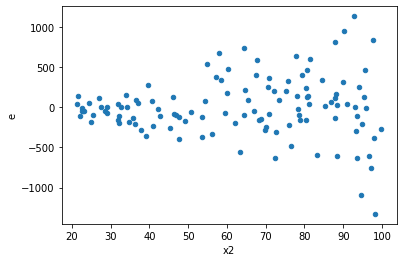

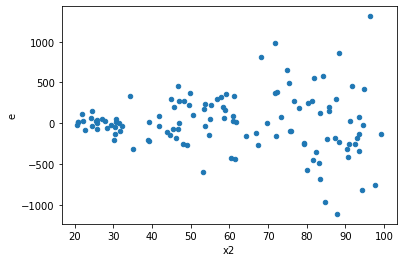

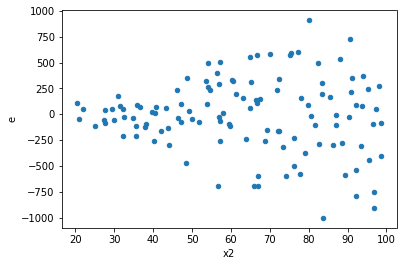

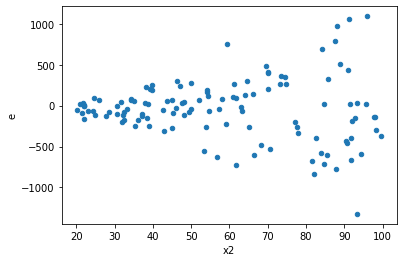

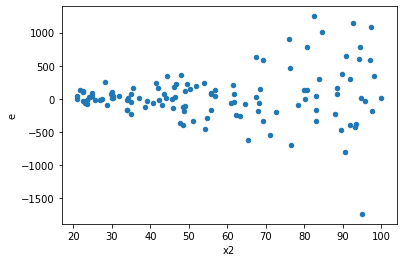

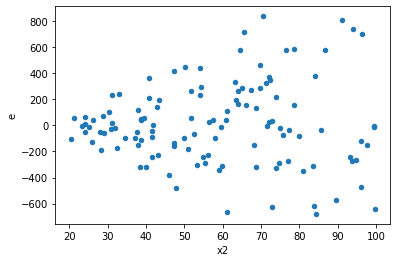

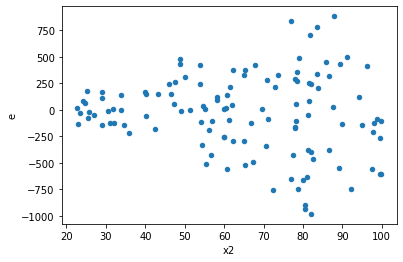

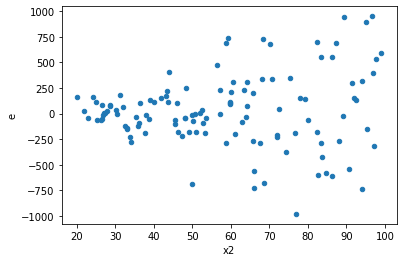

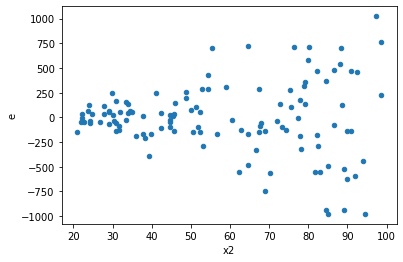

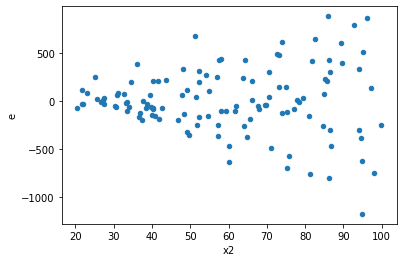

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,48.0,68.0,2144953.7579082595,13333398.615104694,44686.53662308874,196079.39139859844,4.387885171152147,3.2192601473468585e-08,0.9999999839036993,1.6096300736734293e-08,Reject001=0 : Heteroscedasticity
2.0,58.0,58.0,6619461.472908756,7949092.63574332,114128.64608463371,137053.32130591932,1.2008669690542504,0.487976536057269,0.7560117319713655,0.2439882680286345,Reject001=1 : Homoscedasticity
6.0,46.0,70.0,4174238.988887449,11574933.779240761,90744.32584537932,165356.19684629657,1.8222207868737665,0.022946635802972626,0.9885266820985137,0.011473317901486313,Reject001=1 : Homoscedasticity
7.0,47.0,69.0,3319593.590405172,11256069.36115852,70629.65085968451,163131.44001679015,2.309673600693187,0.0015186394080060062,0.999240680295997,0.0007593197040030031,Reject001=0 : Heteroscedasticity
8.0,61.0,55.0,2172662.6300464766,13073191.215917012,35617.42016469634,237694.38574394566,6.673543020377038,3.076516819078279e-11,0.9999999999846174,1.5382584095391394e-11,Reject001=0 : Heteroscedasticity
9.0,62.0,54.0,4687943.166632778,8318496.057718189,75611.9865585932,154046.2232910776,2.037325433470845,0.00835642759588584,0.9958217862020571,0.00417821379794292,Reject001=0 : Heteroscedasticity
10.0,55.0,61.0,1218485.0222758984,14021990.710614437,22154.27313228906,229868.70017400716,10.375817739602647,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,68.0,48.0,2258108.113082784,11909275.301198294,33207.47225121741,248109.9021082978,7.471508226561927,2.556599376646318e-11,0.999999999987217,1.278299688323159e-11,Reject001=0 : Heteroscedasticity
15.0,50.0,66.0,1569346.3457524213,11508539.760792183,31386.926915048425,174371.8145574573,5.555555503391922,2.40879760582402e-10,0.9999999998795601,1.20439880291201e-10,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,48.0,68.0,2144953.7579082595,13333398.615104694,44686.53662308874,196079.39139859844,4.387885171152147,3.2192601473468585e-08,Reject001=0 : Heteroscedasticity
1.0,52.0,64.0,10537305.771540545,2738249.242530041,202640.49560654894,42785.14441453189,0.21113817495592999,4.534467920152976e-08,Reject001=0 : Heteroscedasticity
2.0,58.0,58.0,6619461.472908756,7949092.63574332,114128.64608463371,137053.32130591932,1.2008669690542504,0.487976536057269,Reject001=1 : Homoscedasticity
3.0,50.0,66.0,12866362.492591996,2578308.9363112887,257327.2498518399,39065.2869138074,0.1518116986689122,1.5377818163360033e-10,Reject001=0 : Heteroscedasticity
4.0,51.0,65.0,15293989.643741388,1706340.23983907,299882.1498772821,26251.38830521646,0.08753901596330113,1.1996706579909907e-15,Reject001=0 : Heteroscedasticity
5.0,49.0,67.0,6471017.5336321825,4924262.064291648,132061.58231902414,73496.44872077086,0.5565316379688973,0.032819749713825994,Reject001=1 : Homoscedasticity
6.0,46.0,70.0,4174238.988887449,11574933.779240761,90744.32584537932,165356.19684629657,1.8222207868737665,0.022946635802972626,Reject001=1 : Homoscedasticity
7.0,47.0,69.0,3319593.590405172,11256069.36115852,70629.65085968451,163131.44001679015,2.309673600693187,0.0015186394080060062,Reject001=0 : Heteroscedasticity
8.0,61.0,55.0,2172662.6300464766,13073191.215917012,35617.42016469634,237694.38574394566,6.673543020377038,3.076516819078279e-11,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    613
Reject001=1 : Homoscedasticity      387
Name: Result_test, dtype: int64